In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

loan = pd.read_csv('loan.csv', low_memory = False)

print(loan.head(5))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000             4975   36 months   
1  1077430    1314167       2500         2500             2500   60 months   
2  1077175    1313524       2400         2400             2400   36 months   
3  1076863    1277178      10000        10000            10000   36 months   
4  1075358    1311748       3000         3000             3000   60 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4     12.69        67.79     B        B5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_li

I started with importing the packages I will be using, reading the data into a pandas dataframe, and showing the first 5 rows per column

In [3]:
loan.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [4]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

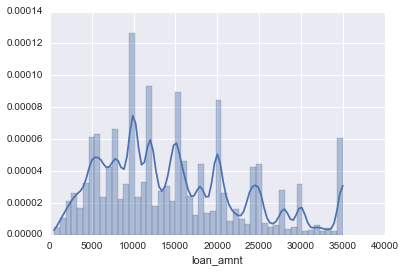

In [5]:
#Let's start taking a look at the loan amounts distribution
sns.distplot(loan['loan_amnt'])

The majority of loan amounts is between $5,000 and $20,000

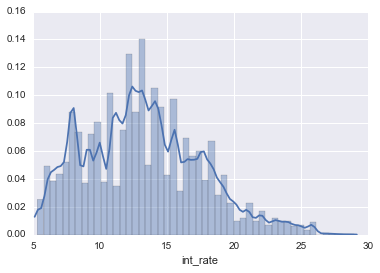

In [6]:
sns.distplot(loan['int_rate'])

The most common interest rates range from about 7% to 20

(0, 200000)

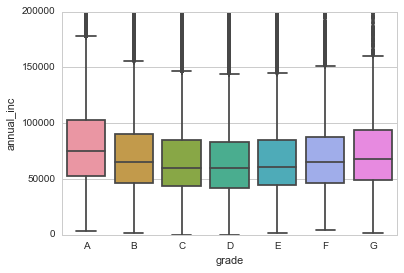

In [7]:
sns.set_style('whitegrid')
sns.boxplot(x='grade', y='annual_inc',order=['A','B','C','D','E','F','G'], data= loan)
plt.ylim(0, 200000)

Grade A loan recipients tend to have a higher income.
However, the difference among other groups is not as noticeable

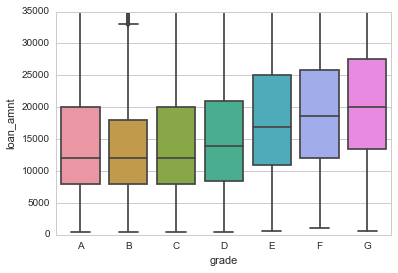

In [8]:
sns.set_style('whitegrid')
sns.boxplot(x='grade',y='loan_amnt', order=['A','B','C','D','E','F','G'], data = loan)

The boxplot above shows that customers who borrow more money tend to have a worse grade 
than those who borrow less

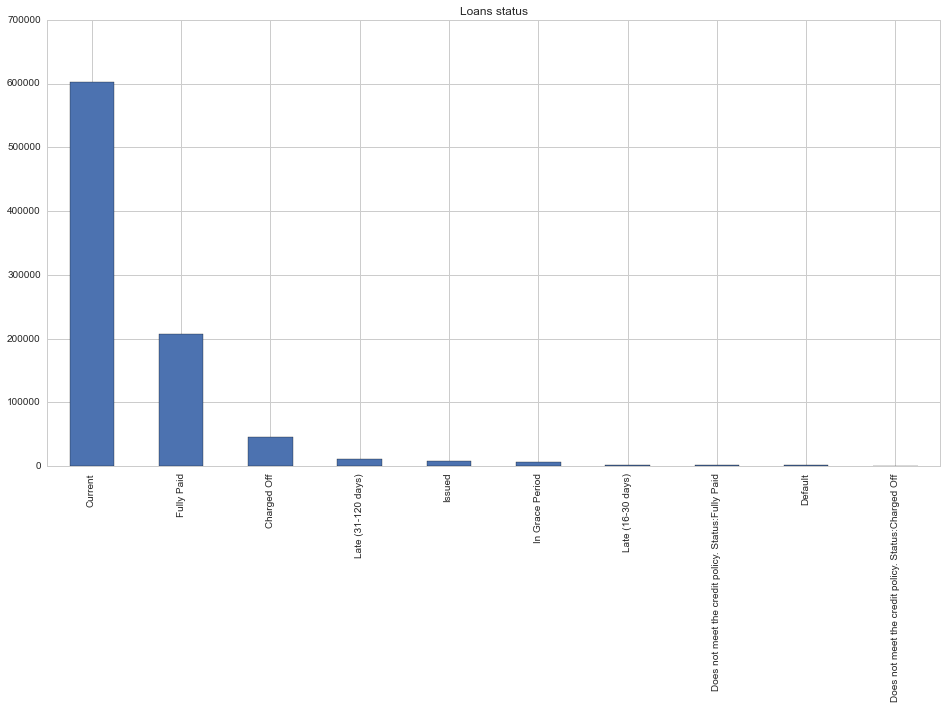

In [9]:
number_of_defaults = loan['loan_status'].value_counts()
number_of_defaults.plot(kind='bar', figsize=(16,8), title = 'Loans status')

a grace period is the period during which no interest is charged on a credit card.
A charge-off or chargeoff is the declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt. Traditionally, creditors will make this declaration at the point of six months without payment.

In [10]:
number_of_defaults

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
dtype: int64

The vast majority of loans is currently in process.
This makes me want to analyze the default rates of prior years
in order to discover the trze default rate

Below I am simply transforming the 'issue_d' column from an object to a datetime, so that I can slice it

In [11]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'])
print(loan['issue_d'].head(5))

0   2011-12-25
1   2011-12-25
2   2011-12-25
3   2011-12-25
4   2011-12-25
Name: issue_d, dtype: datetime64[ns]


I am indexing the data by using the column 'issue_d'
Subsequently I am sorting the index

In [12]:
loan_issued_indexed = loan.set_index(loan['issue_d'])
loan_issued_indexed = loan_issued_indexed.sort_index()

I can also use the following method (Jianda's method, but you have to import datetime as dt)

In [13]:
year = pd.to_datetime(loan['issue_d']).dt.year
loans_filtered_bestmethod = loan[(year<=2011) & (year>=2007)]
print(loans_filtered_bestmethod.shape)

(42535, 74)


I am creating different dataframes for each year going from 2007 until 2010. The number of defaults for this years
seems to be quite high. (method above is better)

In [14]:
loan_filtered_2007_10 = loan_issued_indexed.ix[datetime.date(2007,6,17):datetime.date(2011,12,1)]
loan_filtered_2007 = loan_issued_indexed.ix[datetime.date(2007,6,17):datetime.date(2008,1,1)]
loan_filtered_2008 = loan_issued_indexed.ix[datetime.date(2008,1,1):datetime.date(2009,1,1)]
loan_filtered_2009 = loan_issued_indexed.ix[datetime.date(2009,1,1):datetime.date(2010,1,1)]
loan_filtered_2010 = loan_issued_indexed.ix[datetime.date(2010,1,1):datetime.date(2011,1,1)]

In [15]:
loan_filtered_2007_10['loan_status'].value_counts()

Fully Paid                                             30581
Charged Off                                             5161
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                 1688
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        45
In Grace Period                                           24
Late (16-30 days)                                         12
Default                                                    8
dtype: int64

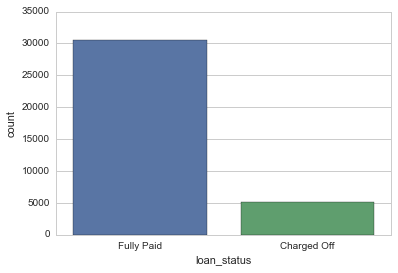

In [16]:
sns.countplot(x = 'loan_status', data = loan_filtered_2007_10, order = ['Fully Paid', 'Charged Off'])

Let's create a dataframe that includes only the ended loans

In [17]:
ended_loans = loan[(loan['loan_status'] == 'Fully Paid') | (loan['loan_status'] == 'Charged Off') | (loan['loan_status'] == 'Default')]


transforming 'loan_status' into a flag variable. 

In [18]:
# you can also try the following
#  ended_loans.loan_status.replace(['Fully Paid','Default','Charged Off'],[0,1,1,], inplace=True)

Onto machine learning. Importing the necessary packages and splitting the data

AttributeError: 'DataFrame' object has no attribute 'numerical'